In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
data = load_iris()
print(data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
def svc_iris_classifier(iris, kernel='linear', C=1.0, gamma='auto'):
    X, y = iris.data[:, :2], iris.target
    clf_svc_iris = SVC(kernel=kernel, C=C, gamma=gamma)
    clf_svc_iris.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    h = (x_max / x_min) / 100
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    Z = clf_svc_iris.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.BuGn_r)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC (kernel='{}', C={}, gamma={})".format(kernel, C, gamma))

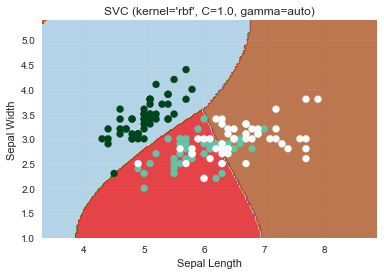

In [4]:
svc_iris_classifier(data, kernel='rbf', C=1.0)

In [16]:
X, y = data.data[:, :2], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf_svc_iris = SVC(kernel="linear", C=1.0, gamma="auto")
clf_svc_iris.fit(X_train, y_train)

# clf_svc_iris.predict(X_test)
clf_svc_iris.score(X_test, y_test)

0.81578947368421051

In [17]:
X, y = data.data[:, :2], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

possible_kernels = ["linear", "rbf"]
possible_Cs = [1.0, 10.0, 100.0, 1000.0]
possible_gammas = ["auto", 0.1, 1.0, 10.0, 100.0]

def get_tuned_SVC_score(kernel, C, gamma):
    clf = SVC(kernel=kernel, C=C, gamma=gamma)
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

clf_scores = list()
for kernel in possible_kernels:
    for C in possible_Cs:
        for gamma in possible_gammas:
            clf_scores.append((get_tuned_SVC_score(kernel=kernel, C=C, gamma=gamma), kernel, C, gamma))
            
rel_max, position = 0, 0
for index, item in enumerate(clf_scores):
    if item[0] > rel_max:
        rel_max = item[0]
        position = index
        
print("\nBEST SVM CLASSIFIER SCORE WITH DETAILS IS: \n\n - Score: {}\n - Kernel: '{}'\n - C: {}\n - Gamma: {}\n".format(clf_scores[position][0], clf_scores[position][1], clf_scores[position][2], clf_scores[position][3]))


BEST SVM CLASSIFIER SCORE WITH DETAILS IS: 

 - Score: 0.8157894736842105
 - Kernel: 'rbf'
 - C: 1.0
 - Gamma: 0.1



In [18]:
all_accuracies = cross_val_score(estimator=clf_svc_iris, , cv=5)

SyntaxError: positional argument follows keyword argument (<ipython-input-18-47533bffc751>, line 1)